In [1]:
import numpy as np 
from matplotlib import pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation
from IPython.display import HTML,Image
import seaborn as sns
import time 

%matplotlib inline
plt.style.use('seaborn-white')

# 等式约束熵极大化
$$
\begin{align}
&\min \quad f(x)=\sum_{i=1}^n x_i \log x_i \\
&s.t. \quad Ax=b
\end{align}
$$
其中$dom f=\Bbb{R}^{n}_{++},A\in \Bbb{R}^{p\times n},p<n$

假设$n=100,p=30$

分别采用下列方法计算

* 标准Newton 
* 不可行初始点的Newton 方法
* 对偶问题的Newton 方法

In [2]:
# 全局变量 维数
n,p=100,30 

In [3]:
# 生成矩阵A和x,求出b
# 其中x作为初值
# 固定随机种子
np.random.seed(0)
x_0=np.random.uniform(size=(n,1))
# 寻找满秩矩阵 
while True:
    A=np.random.random(size=(p,n)) # A的分布不要有负数
    if np.linalg.matrix_rank(A)==p:
        print('Rank(A)={}'.format(np.linalg.matrix_rank(A)))
        break 
# 生成b  
b=np.dot(A,x_0)
A_T=A.T 
print(b.shape)

Rank(A)=30
(30, 1)


In [4]:
# 定义f(x)

f=lambda x:np.sum(x*np.log(x))

## standard Newton Method with equation constraint


\begin{align}
&\min \quad \sum_{i=1}^n x_i \log x_i \\
&s.t. \quad Ax=b
\end{align}

### $\nabla f(x)$
$$
\begin{align}
\frac{\partial f}{\partial x_i}=\log x_i+1
\end{align}
$$

In [5]:
# 梯度

grad=lambda x:np.log(x)+1

### $\nabla ^2 f(x)$
$$
\begin{align}
&\frac{\partial f}{\partial x_i \partial x_j}=0 \\
&\frac{\partial f}{\partial x_i \partial x_i}=\frac{1}{x_i} \\
\end{align}
$$

In [6]:
# Hessian matrix
def H(x): # input(100,1)=>(100,100)
    temp=np.reshape(1.0/x,n)
    return np.diag(temp)

$\lambda^2(x)=v^T\nabla^2 f(x)v$

In [7]:
# Newton decrement
# 计算的为lambda的平方
# def dec(x,v):
#     return np.dot(np.dot(v.T,H(x)),v)
dec=lambda x,v:np.dot(np.dot(v.T,H(x)),v)

In [8]:
# 回溯直线搜索
def lineSearch(x,d,Decr): # x:迭代点,d:方向，dec:Newton decrement
    alpha,beta,t=0.5,0.8,1
    while (f(x+t*d)>f(x)-alpha*t*Decr):
        t=t*beta 
    return t
        


## 算法流程

---
给定起始点$x,\epsilon$
**Repeat**
* 解KKT 方程=> $\Delta x_{nt},\lambda (x)$
* quit if $\lambda^2/2 \le \epsilon$
* line search 确定步长$t$
* Update: $x:=x+t\Delta x_{nt}$

---


In [9]:
# given x,epsilon
# 这一部分全部使用np.narray
x_1=x_0.copy()
epsilon=1e-20
# 迭代次数
step=0
# 
Loss_1=[]
z1,z2=np.zeros((30,30)),np.zeros((30,1))
start_time=time.time()
while True:
    # 计算loss
    loss=f(x_1)
    Loss_1.append(loss)
    print("第{}轮:{}".format(step,loss))
    # 计算梯度
    g,Hessian=grad(x_1),H(x_1)
    # solve KKT equation
    W=np.bmat([[Hessian,A_T],[A,z1]]).A # ndim=(130,130)
    y=-np.bmat([[g],[z2]]).A
    ans=np.linalg.solve(W,y)
    # 原方向，对偶方向
    d,w=ans[:n],ans[n:]
    # Newton decrement
    decrment=dec(x_1,d)[0][0] # 此处应转换(1,1)=>num
    # stop criteria
    if 0.5*decrment<=epsilon:
        break
    t=lineSearch(x_1,d,decrment)
    # update
    x_1=x_1+t*d
    step+=1 
    
print("运行时间:{}sec".format(time.time()-start_time))
print('最优解x:{}'.format(x_1.T))

第0轮:-25.28682676146397
第1轮:-31.697888382730685
第2轮:-33.441493955324795
第3轮:-33.76524461665182
第4轮:-33.79999421704181
第5轮:-33.8005789968245
第6轮:-33.80057915377152
第7轮:-33.80057915377154
运行时间:0.03899884223937988sec
最优解x:[[0.45166225 0.84568564 0.62153312 0.32612493 0.2820677  0.3639384
  0.6348756  0.41255929 0.52089115 0.3350072  0.34637185 0.60604723
  0.47780668 0.66914287 0.51982616 0.31537145 0.27842364 0.6054929
  0.46693882 0.5353154  0.54863546 0.56366831 0.50945812 0.46803076
  0.35828658 0.50910637 0.2741074  0.34986025 0.33905688 0.45523651
  0.36334229 0.46494663 0.34730977 0.42964977 0.44376248 0.74709176
  0.36196932 0.52321455 0.78111212 0.33303606 0.60925773 0.75305684
  0.53771784 0.29948453 0.56923248 0.36495248 0.35873151 0.45689283
  0.29889381 0.33187752 0.66805924 0.5996819  0.60377927 0.38187966
  0.58511276 0.4775522  0.49479036 0.51264297 0.40829874 0.47382847
  0.32141838 0.55714756 0.42809245 0.4909001  0.3921601  0.4333641
  0.49079635 0.2929885  0.59853906 0.

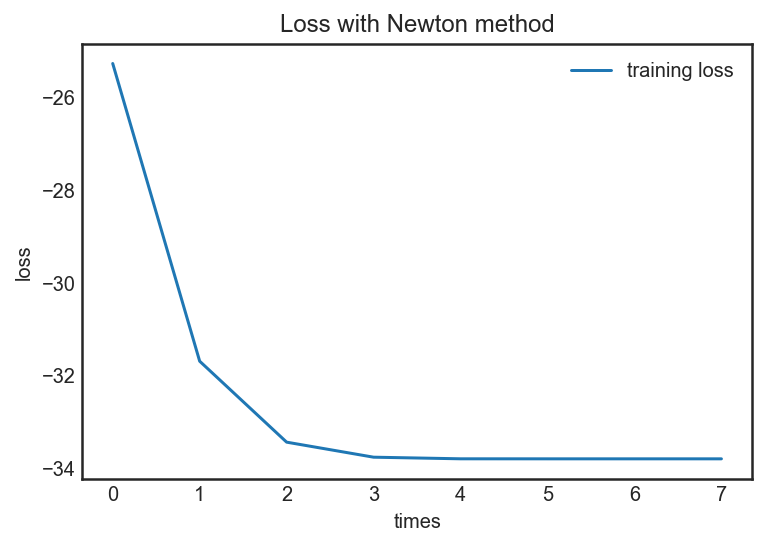

In [10]:
%config InlineBackend.figure_format='retina'
plt.plot(Loss_1,label='training loss')
plt.title('Loss with Newton method')
plt.xlabel('times')
plt.ylabel('loss')
plt.legend()


## Starting from Infeasible Newton Method

In [11]:
# 读取数据
A=np.loadtxt('A.txt')
b=np.loadtxt('b.txt')

In [12]:
# 梯度
grad=lambda x:np.log(x)+1
# Hessian
def H(x): # input(100,1)=>(100,100)
    temp=np.reshape(1.0/x,n)
    return np.diag(temp)
# 原函数
f=lambda x:np.sum(x*np.log(x))
# 对偶残差与原残差
def r(x,v):
    rol_1=grad(x)+np.dot(A.T,v)
    rol_2=np.dot(A,x)-b
    return np.concatenate((rol_1,rol_2),axis=0)
#计算二范数
Norm=lambda x:np.linalg.norm(x)



In [13]:
# Newton direction
def d_nt(grad,hessian,v):
    zero1=np.zeros((30,30))
    # 拼接矩阵
    W_c1=np.concatenate((hessian,A),axis=0) # 纵向
    W_c2=np.concatenate((A.T,zero1),axis=0)
    W=np.concatenate((W_c1,W_c2),axis=1) # 横向
    
    b_new=-r(x,v)
    # d,w 
    res=np.linalg.solve(W,b_new)
    return res[:n],res[n:]

**算法(Infeasible start Newton method)**

---
给定起始点$x \in dom f$,v,tolerance $\epsilon>0,\alpha \in (0,1/2)$

**Repeat**
* 计算原对偶牛顿方向$\Delta x_{nt},\Delta v_{nt}$
* 对$\|r\|_2$ 直线回溯搜素
  * $t:=1$
  * **while** $\|r(x+t\Delta x_{nt},v+t\Delta v_{nt}) \|_2>(1-\alpha t)\|r(x,v)\|_2$
* 更新:$x:=x+t\Delta x_{nt},v:=v+t\Delta v_{nt}$
  

**Until** $Ax=b$ and $\|r(x,v)\|_2\leq \epsilon$

---

In [14]:
# 随机初始化参数
x=np.random.uniform(size=(n,))
v=np.random.random(p)
# 超参数
eps=1e-12
alpha,beta=0.2,0.5

# 原方向以及对偶方向
Hessian=H(x)
g=grad(x)
dk,dv=d_nt(g,Hessian,v)
step=0
start_time=time.time()
loss_hist=[]
while (Norm(r(x,v))>eps) and ((np.dot(A,x)-b).any()>1e-4):
    loss=f(x)
    print("第{}轮r(x,v)={},loss={}".format(step,Norm(r(x,v)),loss))
    loss_hist.append(loss)
    # line Search
    t=1.0 
    while Norm(r(x+t*dk,v+t*dv))>(1-alpha*t)*Norm(r(x,v)):
        t=beta*t 
    x+=t*dk
    v+=t*dv
    Hessian=H(x)
    g=grad(x)
    dk,dv=d_nt(g,Hessian,v)
    step+=1 
print("最优解x={}".format(x))
print("最优值p={}".format(f(x)))
print("计算时间={}sec".format(time.time()-start_time))

第0轮r(x,v)=69.57356345900297,loss=-25.82140130626489
第1轮r(x,v)=5.476387539373369,loss=-30.27382509702816
第2轮r(x,v)=1.3467250832035884,loss=-32.54316575001707
第3轮r(x,v)=0.19819709552704912,loss=-32.77664323634768
第4轮r(x,v)=0.007322873236739119,loss=-32.78268432720578
第5轮r(x,v)=1.2252356910121065e-05,loss=-32.782692895293614
第6轮r(x,v)=3.8308966240138544e-11,loss=-32.782692895318014
最优解x=[0.61240132 0.5149147  0.60478261 0.68467012 0.65637014 0.46460761
 0.55790405 0.51210362 0.41623328 0.82888925 0.34576797 0.48288991
 0.30172109 0.39117254 0.29953613 0.41954109 0.6530249  0.60804933
 0.40469509 0.52827795 0.77095639 0.62488936 0.54991489 0.38838572
 1.08907977 0.41769904 0.4056318  0.48302407 0.75967002 0.4091075
 0.49851168 0.63867099 0.36740862 0.41175233 0.47032237 0.30919096
 0.60444848 0.42247143 0.44322015 0.47864496 0.36577649 0.38463484
 0.47889732 0.57331565 0.4679424  0.90465925 0.40695724 0.40546196
 0.75938205 0.49866763 0.36734444 0.3583664  0.5426326  0.49064586
 0.4481237 

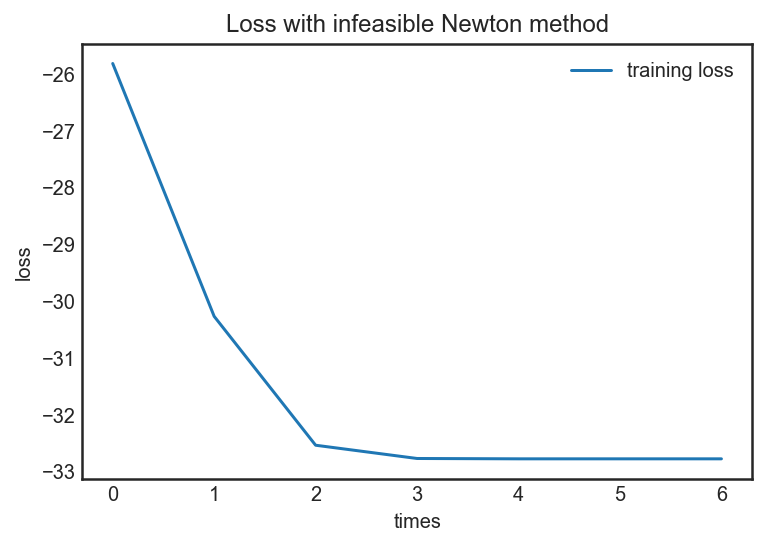

In [15]:
%config InlineBackend.figure_format='retina'
plt.plot(loss_hist,label='training loss')
plt.title('Loss with infeasible Newton method')
plt.xlabel('times')
plt.ylabel('loss')
plt.legend()